# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит ***построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.*** 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### ПЛАН

<br>[Шаг 1. Файл с данными и изучение общей информации](#step1)
<br>[Шаг 2. Предобработка данных](#step2)
<br>[Шаг 3. Подсчет и добавление в таблицу данных](#step3)
<br>[Шаг 4. Проведение исследовательского анализа данных и выполнение инструкции](#step4)
<br>[4.1. Показатели: площадь, цена, число комнат, высота потолков](#step5)
<br>[4.2. Время продажи квартиры](#step6)
<br>[4.3. Редкие и выбивающиеся значения, их особенности.](#step7)
<br>[4.4. Факторы влияющие на стоимость квартиры в Санкт-Петербурге #1](#step8)
<br>[4.5. Квартиры в Санкт-Петербурге_градация по км_область центра_средняя цена км #2](#step9)
<br>[4.6. Сегмент квартир в центре Санкт-Петербурга: площадь, цена, число комнат, высота потолков. Факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) #3](#step10)
<br>[Шаг 5. Общий вывод](#step11)

### Шаг 1. Файл с данными и изучение общей информации <a id='step1'></a>

In [1]:
import pandas as pd #загрузка библиотеки pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv ('//datasets/real_estate_data.csv', sep='\t', decimal=',') #чтение файла_ первые 7 строк
pd.set_option("display.max_columns",40)
data.head(7) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [3]:
data.info() #проверка типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

#### Вывод
Представленная выборка имеет 23699 позиций или объектов недвижимости.
Большинство с типом данных object- требует замены для дальнейшего анализа выборки.
Данные имеют ряд некорректных значений (устранение которых потребуется для проведения анализа и расчетов в проекте):
- по столбцам "last_price","balcony,"days_exposition", "floors_total" необходима замена формата данных на int;
- по "***_area" (все площади для расчета процентов далее),"ceiling_height", "cityCenters_nearest" на float;
- по "balcony" около 50% значений от общей выборки с "NaN"- заменяем на "0"- балконов нет или не были указаны при заполнении поля анкеты в системе, в тч некорректное меню ввода, аналогично "floors_total"-менее 0,4% выборки;
- "days_exposition"- 13%, "ceiling_height"- 39% на значение median: 95 дней и 2.65м соответственно;
- по "is_apartment" (аналогия по студии) замена на тип данных bool;
- по "first_day_exposition" правка по дате, тк время по нулям;
- часть показателей ("parks", "ponds" и тп) имеют скорее справочный интерес- масштабных преобразований не проводим.

Большая часть спорных моментов закрывается реализацией заложенной категориальной выборкой (определенных форматов ввода) и фиксацией обязательных пунктов заполнения анкеты при подаче объявления на сайт. 
<br>Все показатели проверяем итогово по типу данных и виду в таблице выборки. 

### Шаг 2. Предобработка данных <a id='step2'></a>

In [4]:
data.isna().sum() #проверка выборки на предмет пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['ceiling_height'].median() #метод для расчета медианы

2.65

In [6]:
data['days_exposition'].median()

95.0

In [7]:
data[['balcony', 'floors_total']] = data[['balcony','floors_total']].fillna(value=0) 
#заполнение пропущенных значений заменой на 0

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65) #заполнение пропущенных значений заменой на median
data['days_exposition'] = data['days_exposition'].fillna(95.0)    

In [11]:
data.isna().sum()#проверка выборки по результату замены

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [12]:
columns = ['ceiling_height', 'total_area', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'last_price', 'balcony', 'days_exposition', 'floors_total']

for i in columns:
    data[i] = data[i].astype('float64') #замена типа данных с object на float64

In [13]:
columns = ['last_price', 'balcony', 'days_exposition', 'floors_total']
for i in columns:
    data[i] = data[i].astype('int64') #замена типа данных с float64 на int64 

In [14]:
data['is_apartment'] = data['is_apartment'].astype('bool') #замена типа данных с object на bool

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
#замена типа данных с object на формат даты

In [16]:
data.info() #проверка замены на int64, bool, datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000 

In [17]:
pd.set_option("display.max_columns",40)
data.head(7) #проверка формата таблицы по столбцам

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,True,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155


### Шаг 3. Подсчет и добавление в таблицу данных <a id='step3'></a>

Для дальнейших расчетов проекта вносим в data столбцы: "price_per_m2","first_day_exposition_***" (день недели, месяц, год), "floor_namber", "area_living_to_total_%" и "area_kitchen_to_total_%" также с проверкой на обновление данных.

In [18]:
#в таблицу: цена квадратного метра 
data['price_per_m2'] = data['last_price'] / data['total_area'] #отношение столбца цена к общей площади квартиры

In [19]:
#в таблицу: день недели, месяц и год публикации объявления
data ['first_day_exposition_weekday'] = data['first_day_exposition'].dt.weekday 
# разнесение по столбцам (день недели-месяц-год) даты публикации объявления о продаже квартиры

data ['first_day_exposition_month'] = data['first_day_exposition'].dt.month
data ['first_day_exposition_year'] = data['first_day_exposition'].dt.year

In [20]:
#в таблицу: этаж квартиры; варианты — первый, последний, другой

def floor_namber(row): # цикл для установления 3 категории данных, добавлен столбец 'floor_namber'
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else :
        return 'другой'

data['floor_namber'] = data.apply(floor_namber, axis = 1)

In [21]:
#в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
data['area_living_to_total_%'] = data['living_area'] / data['total_area'] # отношение жилой площади к общей
data['area_kitchen_to_total_%'] = data['kitchen_area'] / data['total_area'] # отношение площади кухни к общей

In [22]:
pd.set_option("display.max_columns",40)
data.head(7) #проверка добавленных столбцов
#data.sample(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_namber,area_living_to_total_%,area_kitchen_to_total_%
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,True,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059


#### Вывод:
Для дальнейшего анализа отработаны и проверены обозначенные моменты в представленной выборке, добавлены необходимые столбцы с данными.

### Шаг 4. Проведение исследовательского анализа данных и выполнение инструкции <a id='step4'></a>

Начинаем анализ данных с метода .quantile() или median для исключения "выбросов". 
<br>Исследуемые показатели: площадь, цена, число комнат, высота потолков.
<br>По методам и гистограммам .describe(), .value_counts(), .boxplot(), .hist() видны подозрительно высокие значения показателей- частично исключим методом .query(), критерии будут описаны ниже по тексту.

In [23]:
data.quantile().astype('int64') #аналог медианы по перечню столбцов data

total_images                          9
last_price                      4650000
total_area                           52
rooms                                 2
ceiling_height                        2
floors_total                          9
living_area                          30
floor                                 4
is_apartment                          1
studio                                0
open_plan                             0
kitchen_area                          9
balcony                               0
cityCenters_nearest               13098
days_exposition                      95
price_per_m2                      95000
first_day_exposition_weekday          3
first_day_exposition_month            6
first_day_exposition_year          2017
area_living_to_total_%                0
area_kitchen_to_total_%               0
Name: 0.5, dtype: int64

### 1. Показатели: площадь, цена, число комнат, высота потолков <a id='step5'></a>

#####  Общая площадь квартиры

In [24]:
data['total_area'].describe().astype('int64') #числовая характеристика данных, характеризующая разброс величин (стандартное отклонение )

count    23699
mean        60
std         35
min         12
25%         40
50%         52
75%         69
max        900
Name: total_area, dtype: int64

In [25]:
data['total_area'].value_counts().astype('int64') #кол-во значений по каждому уникальному

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

[Text(0.5, 0, '')]

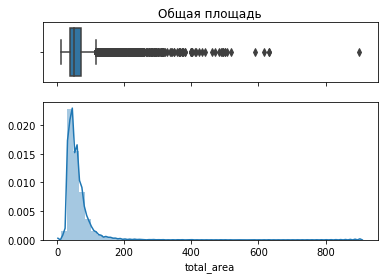

In [26]:
#гистограмма и диаграмма размаха для оценки значения переменной с частотой ее появления
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(data["total_area"], ax=ax_box).set_title('Общая площадь')
sns.distplot(data["total_area"], ax=ax_hist)
ax_box.set(xlabel='')

Неравномерность распределение Пуассона- сдвиг в сторону бОльших значений в 900м2 при медиане в 52м2, квартиры от 105м2 допустимо исключить из выборки

##### Цена квартиры

In [27]:
data['last_price'] = data['last_price'] / 1000000 # цена_в млн.руб.
data['last_price'].describe().astype('int64')

count    23699
mean         6
std         10
min          0
25%          3
50%          4
75%          6
max        763
Name: last_price, dtype: int64

In [28]:
data['last_price'].value_counts()

4.500000    342
3.500000    291
4.000000    260
4.300000    260
4.200000    259
           ... 
7.849000      1
1.440000      1
7.398000      1
7.888000      1
5.556275      1
Name: last_price, Length: 2978, dtype: int64

[Text(0.5, 0, '')]

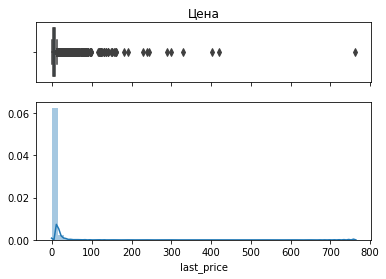

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(data["last_price"], ax=ax_box).set_title('Цена')
sns.distplot(data["last_price"], ax=ax_hist)
ax_box.set(xlabel='')

По разбросу цен правильно оставить в выборке и ориентироваться на диапазон цен в 0.4-9.4 млн.руб. исходя из значений медианы

##### Количество комнат в квартире

In [30]:
data['rooms'].describe().astype('int64')  #число комнат

count    23699
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

In [31]:
data['rooms'].value_counts() 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

[Text(0.5, 0, '')]

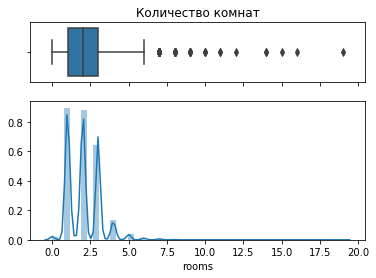

In [32]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(data["rooms"], ax=ax_box).set_title('Количество комнат')
sns.distplot(data["rooms"], ax=ax_hist)
ax_box.set(xlabel='')

БОльшая доля 1-2 комн.квартир, реальные данные- не больше 6 комнат, остальные возможно исключить из выборки

##### Высота потолков в квартире

In [33]:
data['ceiling_height'].describe() #высота потолков

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [34]:
data['ceiling_height'].value_counts() 

2.65      9871
2.50      3515
2.60      1646
2.70      1574
3.00      1112
          ... 
3.98         1
4.65         1
5.80         1
4.90         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

[Text(0.5, 0, '')]

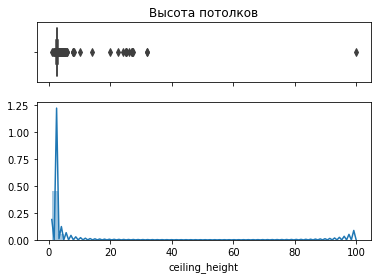

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(data["ceiling_height"], ax=ax_box).set_title('Высота потолков')
sns.distplot(data["ceiling_height"], ax=ax_hist)
ax_box.set(xlabel='')

Норма в жилых помещениях (в тч частных домах)- 2.5-3.5м, остальные правильно будет исключить из выборки

### 2. Время продажи квартиры<a id='step6'></a>

In [36]:
data['days_exposition'].describe().astype('int64') 

count    23699
mean       169
std        206
min          1
25%         45
50%         95
75%        199
max       1580
Name: days_exposition, dtype: int64

In [37]:
data['days_exposition'].value_counts() 

95      3245
45       880
60       538
7        234
30       208
        ... 
807        1
871        1
951        1
999        1
1223       1
Name: days_exposition, Length: 1141, dtype: int64

[Text(0.5, 0, '')]

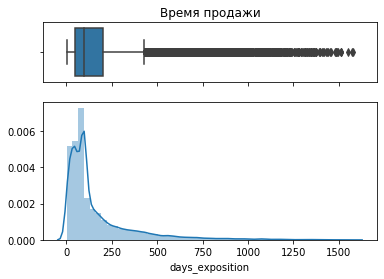

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(data["days_exposition"], ax=ax_box).set_title('Время продажи')
sns.distplot(data["days_exposition"], ax=ax_hist)
ax_box.set(xlabel='')

Разброс количества дней размещения объявлений о продаже отражен на графиках выше.
<br>Среднее в 2 раза выше медианы, что говорит о длином хвосте высоких значений до 1580 дней (более 4 лет!?- неузаконенная перепланировка, много собственников в тч за пределами РФ, обременение).
<br>В среднем объекты продавались за 1,5-3 мес. (на практике 90 дней в среднем реальный срок) при размещении обьявлений на сайт сроком на 30 дней и далее продление при необходимости.
<br>Подозрительная продажа за неделю привлекает внимамание ("серые схемы" молниеносной покупки?!), как и эпопея в 4 года.
<br>Ориентируюсь на медиану в выборке оптимально оставить данные до 190 дней или 5-6 месяцев. 
<br>Также более 3000 объектов с количеством дней размещения "0" заменены на median по столбцу в 95 суток - с возможной причиной  из-за ошибок выгрузки (перегрузки данных из др.баз), форматов и тп

### 3. Редкие и выбивающиеся значения, их особенности <a id='step7'></a>

Краткий перечень:
<br>~ площадь более 105 кв.м;
<br>~ по цене менее 0.4 и более 9.4 млн. рублей;
<br>~ 7-комнатная квартира и больше;
<br>~ с потолками менее 2,5 м и более 3,5 м;
<br>~ состоявшиеся продажи после 6 месяцев или за неделю.

Для формирования правильной выборки good_data методом .query() проводим фильтрацию по обозначенным пунктам.

In [39]:
good_data = data.query('total_area < 105') # площадь

Text(0.5, 1.0, 'Общая площадь_без "шума"')

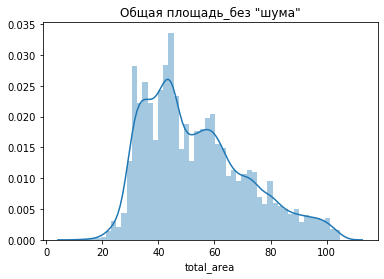

In [40]:
sns.distplot(good_data['total_area'])
plt.title('Общая площадь_без "шума"')

In [41]:
good_data = data.query('0.4 < last_price < 9.4') # цена

Text(0.5, 1.0, 'Цена_без "шума"')

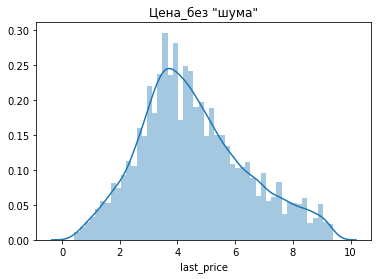

In [42]:
sns.distplot(good_data['last_price'])
plt.title('Цена_без "шума"')

In [43]:
good_data = data.query('rooms < 7') # комнаты

Text(0.5, 1.0, 'Количество комнат_без "шума"')

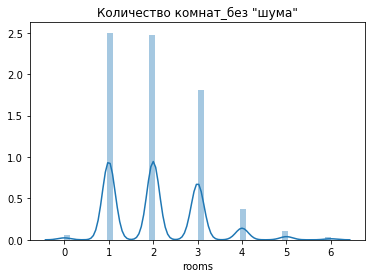

In [44]:
sns.distplot(good_data['rooms'])
plt.title('Количество комнат_без "шума"')

In [45]:
good_data = data.query('2.5 < ceiling_height < 3.5') # высота потолка

Text(0.5, 1.0, 'Высота потолков_без "шума"')

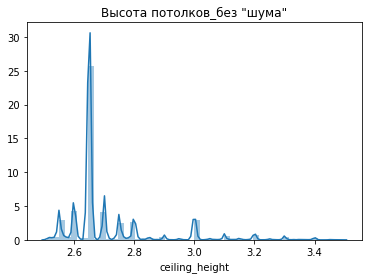

In [46]:
sns.distplot(good_data['ceiling_height'])
plt.title('Высота потолков_без "шума"')

##### Количество этажей в доме
На текущий момент по Санкт-Петербургу максимум по этажности застройки- 37 этажей (потенциальный проект на 45 этажей не состоялся), а в Ленинградской области узаконены постановлением- дома не выше 16 этажей.
<br> Дома в 50 этажей и выше правильно будет исключить из выборки.

In [47]:
good_data = data.query('floors_total < 38')

Text(0.5, 1.0, 'Количество этажей_без "шума"')

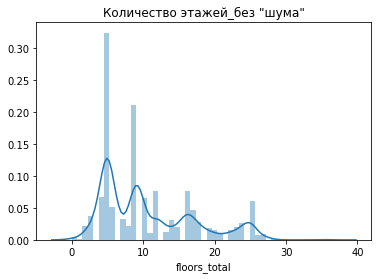

In [48]:
sns.distplot(good_data['floors_total'])
plt.title('Количество этажей_без "шума"')

##### Количество дней размещения

In [49]:
good_data = data.query('days_exposition < 190')

Text(0.5, 1.0, 'Количество дней размещения_без "шума"')

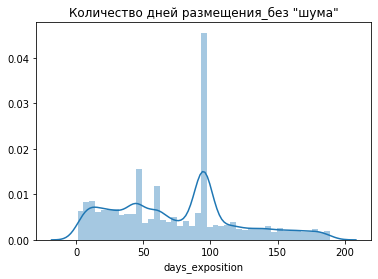

In [50]:
sns.distplot(good_data['days_exposition'])
plt.title('Количество дней размещения_без "шума"')

In [51]:
good_data['days_exposition'].describe().astype('int64') 

count    17520
mean        74
std         45
min          1
25%         37
50%         74
75%         95
max        189
Name: days_exposition, dtype: int64

При обработке данных (очистка от аномально высоких) значения mean-median 74.6-74 от первоначальных 169.4-95.

In [52]:
good_data.head(7) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_namber,area_living_to_total_%,area_kitchen_to_total_%
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3.700,37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059
7,5,7.915,71.60,2019-04-18,2,2.65,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95,110544.692737,3,4,2019,другой,NaN,0.263966
8,20,2.900,33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454.764777,2,5,2018,другой,0.465320,0.265682


In [53]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 23698
Data columns (total 29 columns):
total_images                    17520 non-null int64
last_price                      17520 non-null float64
total_area                      17520 non-null float64
first_day_exposition            17520 non-null datetime64[ns]
rooms                           17520 non-null int64
ceiling_height                  17520 non-null float64
floors_total                    17520 non-null int64
living_area                     15944 non-null float64
floor                           17520 non-null int64
is_apartment                    17520 non-null bool
studio                          17520 non-null bool
open_plan                       17520 non-null bool
kitchen_area                    15668 non-null float64
balcony                         17520 non-null int64
locality_name                   17496 non-null object
airports_nearest                13349 non-null object
cityCenters_nearest      

Text(0.5, 1, 'Тепловая карта корреляционной матрицы')

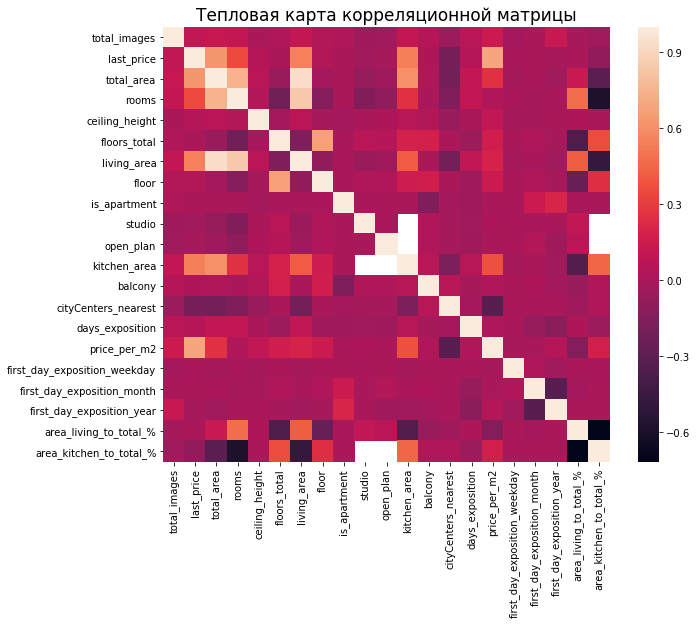

In [54]:
#тепловая карта корреляционной матрицы столбцов good_data
plt.figure(figsize=(10,8))
sns.heatmap(good_data.corr()) 
plt.title('Тепловая карта корреляционной матрицы', fontsize=17)

In [55]:
good_data.corr() #корреляция столбцов good_data

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_per_m2,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,area_living_to_total_%,area_kitchen_to_total_%
total_images,1.000000,0.099429,0.116985,0.103766,0.001803,0.027903,0.106283,0.037958,0.027726,-0.037439,-0.026318,0.105029,0.051968,-0.050986,0.067326,0.135885,-0.013550,0.014170,0.128288,-0.007888,-0.027558
last_price,0.099429,1.000000,0.637767,0.354918,0.050273,0.008955,0.549659,0.036555,0.013034,-0.027272,-0.007518,0.542385,0.019048,-0.195763,0.051650,0.694134,-0.002360,0.008982,-0.009140,0.002613,-0.086960
total_area,0.116985,0.637767,1.000000,0.748948,0.062859,-0.060489,0.935508,-0.016619,0.011519,-0.077822,-0.036453,0.606001,0.023493,-0.211408,0.103114,0.261107,-0.005924,0.005617,-0.030693,0.133174,-0.307845
rooms,0.103766,0.354918,0.748948,1.000000,0.035824,-0.219332,0.842051,-0.144947,0.008367,-0.156698,-0.097692,0.260181,-0.004359,-0.163377,0.103597,0.032878,-0.005355,-0.006991,-0.005109,0.470881,-0.586830
ceiling_height,0.001803,0.050273,0.062859,0.035824,1.000000,-0.018522,0.064085,-0.005721,-0.025113,0.001360,0.021194,0.057426,0.038653,-0.061801,0.001356,0.100957,-0.010639,-0.007377,0.007867,0.015330,0.013804
floors_total,0.027903,0.008955,-0.060489,-0.219332,-0.018522,1.000000,-0.159816,0.666879,-0.004304,0.065261,0.048768,0.185215,0.179747,0.012983,-0.049516,0.167314,0.011333,0.025340,-0.009701,-0.362158,0.357397
living_area,0.106283,0.549659,0.935508,0.842051,0.064085,-0.159816,1.000000,-0.091695,0.007966,-0.059223,-0.037277,0.415769,-0.001990,-0.210966,0.097772,0.194037,-0.006240,-0.004804,-0.025808,0.419002,-0.479904
floor,0.037958,0.036555,-0.016619,-0.144947,-0.005721,0.666879,-0.091695,1.000000,-0.003701,0.031599,0.031615,0.150943,0.162339,0.007434,-0.036460,0.141383,0.013405,0.026148,-0.010806,-0.259442,0.246498
is_apartment,0.027726,0.013034,0.011519,0.008367,-0.025113,-0.004304,0.007966,-0.003701,1.000000,-0.002785,0.003017,0.007846,-0.161726,-0.023042,-0.038149,0.013640,0.006598,0.140044,0.205370,-0.000656,0.003900
studio,-0.037439,-0.027272,-0.077822,-0.156698,0.001360,0.065261,-0.059223,0.031599,-0.002785,1.000000,-0.004886,NaN,0.027044,-0.010598,-0.025962,0.017408,-0.004701,-0.005035,-0.002765,0.098885,NaN


### 4. Факторы влияющие на стоимость квартиры в Санкт-Петербурге #1<a id='step8'></a>

##### Зависимость цены от квадратного метра, числа комнат, удалённости от центра, этажа (первого или последнего)

Text(0.5, 1.01, 'Зависимость цены от общей площади')

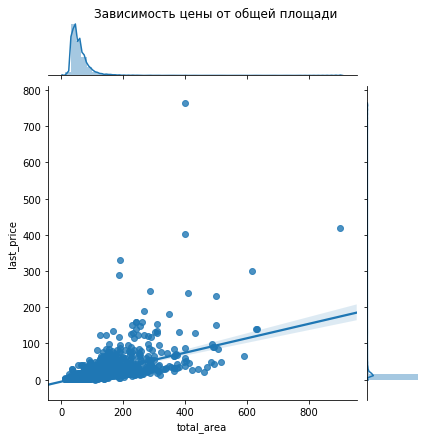

In [56]:
#зависимость цены от общей площади квартиры
sns.jointplot(x=data["total_area"], y=data["last_price"], kind='reg')
plt.suptitle('Зависимость цены от общей площади', y=1.01)

Text(0.5, 1.01, 'Зависимость цены от количества комнат')

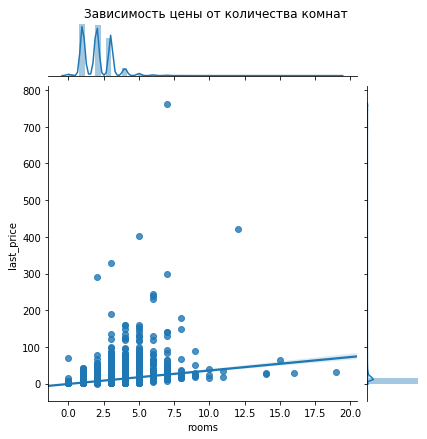

In [57]:
#зависимость цены от количества комнат
sns.jointplot(x=data["rooms"], y=data["last_price"], kind='reg')
plt.suptitle('Зависимость цены от количества комнат', y=1.01)

Text(0.5, 1.01, 'Зависимость цены: расстояние от населенного пункта до центра')

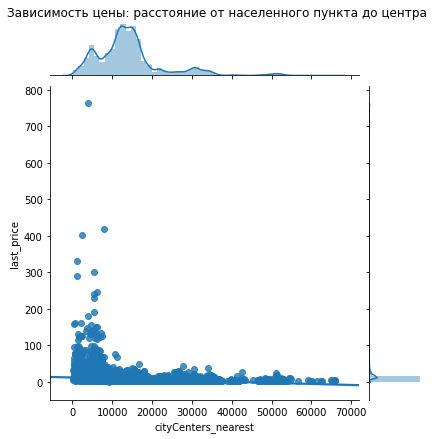

In [58]:
#зависимость цены: расстояние от населенного пункта до центра
sns.jointplot(x=data["cityCenters_nearest"], y=data["last_price"], kind='reg')
plt.suptitle('Зависимость цены: расстояние от населенного пункта до центра', y=1.01)

другой       13045
последний     2424
первый        2051
Name: floor_namber, dtype: int64

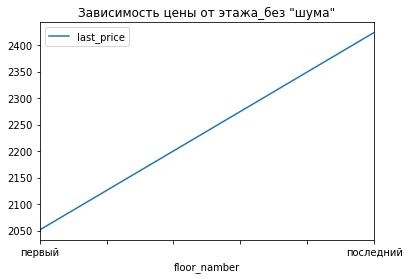

In [59]:
#зависимость цены от этажа (первого или последнего)
floor_namber_pivot_table = good_data.query('floor_namber != "другой"').pivot_table(index = 'floor_namber', values = 'last_price', aggfunc = ['count'])
floor_namber_pivot_table.plot(y = 'count')
plt.title('Зависимость цены от этажа_без "шума"')
good_data['floor_namber'].value_counts() 

Ожидаемо наибольшая корреляция между площадью квартиры и стоимостью (коэффициент корреляции 0,64).
<br>Аналогично количество комнат влияет на рост в цене квартиры (коэффициент корреляции 0,35), но есть пик в 7 комнат- далее цена начинает падать. Возможная причина невысокого спроса на подобные варианты помимо приличной стоимости лота- старый жилой фонд, коммунальные квартиры. 
<br>Расстояние до центра влияет обратнопропорционально (коэффициент корреляции -0,20), движение выборки скорее равномерное.
<br>Квартиры на первом и последних этажах обычно продаются более длительное время: последний этаж- из-за высокой стоимости (в сравнении с первым этажом стоимость выше на 17%), первый- из-за низкого спроса.

##### Зависимость цены от даты размещения: дня недели, месяца и года

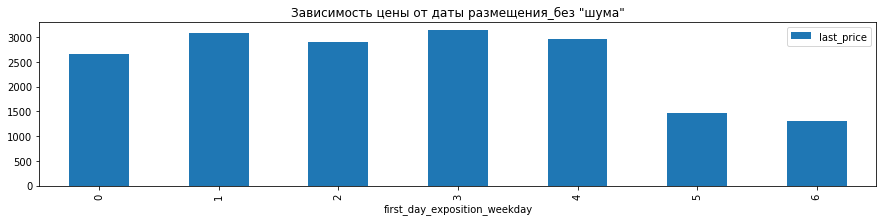

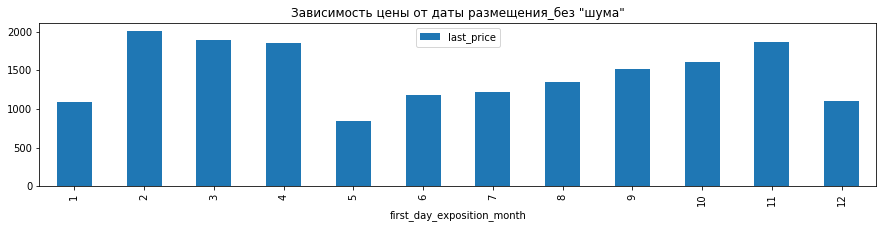

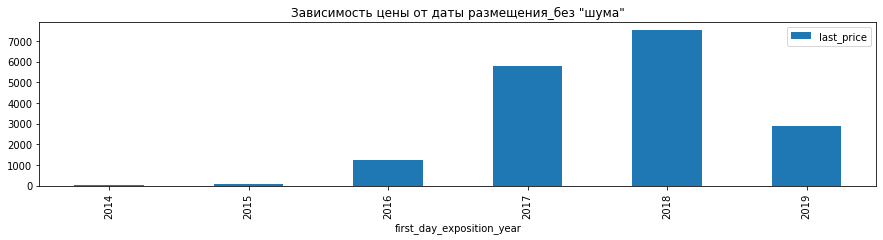

In [60]:
for columns in ['first_day_exposition_weekday', 'first_day_exposition_month', 'first_day_exposition_year']:
    (good_data.pivot_table(index=columns, values= 'last_price', aggfunc='count')
    .plot.bar(figsize=(15, 3)))
    plt.title('Зависимость цены от даты размещения_без "шума"')
    plt.show()

Даты публикации объявлений незначительно влияют на стоимость.
<br>Наблюдается следующая картина:
<br>- наиболее дорогие бъекты размещались во Вторника и Четверг- в пик наибольшей деловой активности;
<br>- с Октября по Ноябрь (данный момент имеет место быть в реальности в новый год с новой продажей), также Февраль-Апрель, а вот летний период отпусков- это типичный провал по показателям продаж;
<br>- в 2017 год- еще докризисный год и сохранение высокого уровня в динамике лет до 2018 года.

##### 10 населённых пунктов с наибольшим числом объявлений_цена м2_max_min по цене

In [61]:
#применение группировки данных, для уточнения формата графиков
locality_name_pivot_table = good_data.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc=['count', 'mean'])
locality_name_pivot_table.columns = ['count', 'mean']
locality_name_pivot_table = locality_name_pivot_table.sort_values('count', ascending = False)
locality_name_pivot_table.head(10).astype('int64') 

,count,mean
locality_name,,
Санкт-Петербург,11617,114163
посёлок Мурино,403,86460
посёлок Шушары,333,79169
Всеволожск,279,69629
Колпино,262,75744
Пушкин,252,102074
посёлок Парголово,247,89932
Гатчина,220,69528
деревня Кудрово,216,93173


<br>В выборке из 10 населенных пунктов лидерство за Санкт-Петербургом, а самый минимальный по цене квадратный метр в Выборге (в 2 раза ниже в сравнении с ценами северной столицы России). 
<br> Вместе с тем наблюдается естественная закономерность современных тенденций (тренд жизни за городом): цена за квадратный метр в поселках и деревнях (Кудрово, Парголово, Мурино, Шушары) выше городских и стремятся приблизиться к столичной недвижимости.  

### 5. Квартиры в Санкт-Петербурге_градация по км_область центра_средняя цена км #2<a id='step9'></a>

In [62]:
good_data['cityCenters_nearest'].describe().astype('int64') 

count    13367
mean     14346
std       8364
min        181
25%       9789
50%      13252
75%      16296
max      65952
Name: cityCenters_nearest, dtype: int64

In [63]:
import warnings #отключение предупреждений
    
warnings.simplefilter('ignore')   

In [64]:
km_spb = good_data.query('locality_name == "Санкт-Петербург"')

def metre_to_km(row):
    try:
        return round(row['cityCenters_nearest']/1000, 0) #перевод расстояния в км
    except:
        good_data['cityCenters_nearest'].fillna(good_data['cityCenters_nearest'].median()) #замена NaN на медиану
km_spb['cityCenters_nearest_km'] = km_spb.apply(metre_to_km, axis=1)
km_spb.sample(7) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_namber,area_living_to_total_%,area_kitchen_to_total_%,cityCenters_nearest_km
2893,11,5.30,35.0,2017-02-15,1,2.65,19,14.0,7,True,False,False,9.5,0,Санкт-Петербург,19499.0,4844.0,0.0,NaN,1.0,503.0,170,151428.571429,2,2,2017,другой,0.400000,0.271429,5.0
2080,11,4.90,66.0,2017-02-07,3,2.65,9,42.0,2,False,False,False,10.3,2,Санкт-Петербург,19693.0,13494.0,0.0,NaN,0.0,NaN,42,74242.424242,1,2,2017,другой,0.636364,0.156061,13.0
5298,10,7.90,76.0,2018-01-13,3,2.75,25,48.0,4,True,False,False,10.0,1,Санкт-Петербург,28959.0,10890.0,1.0,212.0,0.0,NaN,10,103947.368421,5,1,2018,другой,0.631579,0.131579,11.0
22007,9,5.00,28.3,2019-04-22,1,2.65,11,21.3,9,True,False,False,NaN,0,Санкт-Петербург,30824.0,6469.0,1.0,756.0,1.0,936.0,95,176678.445230,0,4,2019,другой,0.752650,NaN,6.0
3362,9,4.30,45.4,2017-10-18,2,2.70,9,29.4,1,True,False,False,8.1,0,Санкт-Петербург,11930.0,13373.0,0.0,NaN,0.0,NaN,121,94713.656388,2,10,2017,первый,0.647577,0.178414,13.0
18169,20,12.60,109.0,2017-07-16,2,2.75,25,53.0,13,True,False,False,19.0,1,Санкт-Петербург,36724.0,9781.0,1.0,645.0,0.0,NaN,95,115596.330275,6,7,2017,другой,0.486239,0.174312,10.0
9942,10,5.07,42.0,2017-12-14,1,2.80,22,18.0,7,True,False,False,11.0,2,Санкт-Петербург,52212.0,16802.0,0.0,NaN,1.0,733.0,117,120714.285714,3,12,2017,другой,0.428571,0.261905,17.0


In [65]:
#pivot_table зависимости км и стоимости м2
km_pivot_table = km_spb.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_m2', aggfunc = 'mean')
km_pivot_table.head(7).astype('int64') 

,price_per_m2
cityCenters_nearest_km,
0.0,260335
1.0,181826
2.0,157582
3.0,125616
4.0,133743
5.0,141150
6.0,148490


Text(0.5, 1.0, 'Зависимости км и стоимости м2')

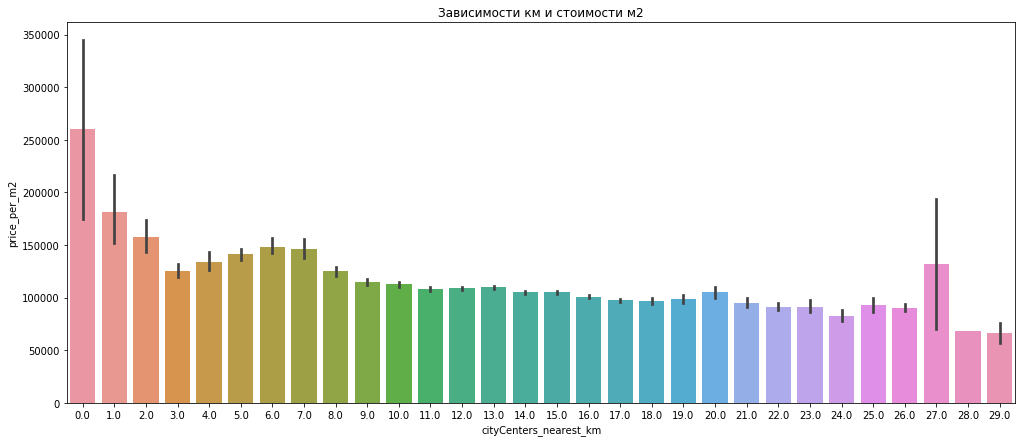

In [66]:
plt.figure(figsize=(17,7))
sns.barplot(data= km_spb, x='cityCenters_nearest_km', y='price_per_m2')
plt.title('Зависимости км и стоимости м2')

Из выведенной градации по км в Санкт-Петербурге видно следующее:
<br>-обратнопропорциональная зависимость отражена на графике (коэффициент корреляции -0,32);
<br>-старт с 29-го км по цене 62 418 руб. за кв.км доходит до 1-го км со стоимостью 260 335 руб. (рост по стоимости в 4 раза отражает приличную разницу цен между центром и окраинами города), а резкое изменение на уровне 7 км сигнализирует о центральной зоне.

### 6. Сегмент квартир в центре Санкт-Петербурга: площадь, цена, число комнат, высота потолков. <br> Факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) #3<a id='step10'></a>

###### Параметры: площадь, цена, число комнат, высота потолков.

In [67]:
#выделим квартиры в центре, беря за радиус 7 км (кол-во объектов- 2299)
good_data_center_spb = km_spb.query('cityCenters_nearest_km <= 7 & locality_name == "Санкт-Петербург"')

In [68]:
pd.set_option("display.max_columns",40)
good_data_center_spb.head(7) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_namber,area_living_to_total_%,area_kitchen_to_total_%,cityCenters_nearest_km
52,20,11.795,136.0,2017-09-22,6,3.00,2,94.0,2,True,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,95,86727.941176,4,9,2017,последний,0.691176,0.080882,7.0
63,2,20.000,118.0,2018-09-11,3,3.00,9,68.0,7,True,False,False,16.0,0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37,169491.525424,1,9,2018,другой,0.576271,0.135593,5.0
94,3,3.500,29.5,2019-04-26,1,2.50,5,15.6,2,True,False,False,5.5,1,Санкт-Петербург,12921.0,7303.0,0.0,NaN,0.0,NaN,4,118644.067797,4,4,2019,другой,0.528814,0.186441,7.0
99,32,9.600,90.0,2017-09-26,4,2.65,5,67.0,2,True,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104,106666.666667,1,9,2017,другой,0.744444,0.088889,3.0
106,9,10.500,124.1,2017-05-25,5,3.20,4,79.4,3,True,False,False,20.0,0,Санкт-Петербург,26825.0,5527.0,1.0,384.0,0.0,NaN,6,84609.186140,3,5,2017,другой,0.639807,0.161160,6.0
111,4,4.590,40.0,2017-05-29,1,2.65,6,18.0,1,True,False,False,10.0,0,Санкт-Петербург,20062.0,6175.0,1.0,241.0,0.0,NaN,31,114750.000000,0,5,2017,первый,0.450000,0.250000,6.0
114,5,4.000,21.4,2019-02-07,1,2.90,8,8.3,7,True,False,False,6.3,0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,95,186915.887850,3,2,2019,другой,0.387850,0.294393,6.0


In [69]:
good_data_center_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 52 to 23694
Data columns (total 30 columns):
total_images                    2299 non-null int64
last_price                      2299 non-null float64
total_area                      2299 non-null float64
first_day_exposition            2299 non-null datetime64[ns]
rooms                           2299 non-null int64
ceiling_height                  2299 non-null float64
floors_total                    2299 non-null int64
living_area                     2076 non-null float64
floor                           2299 non-null int64
is_apartment                    2299 non-null bool
studio                          2299 non-null bool
open_plan                       2299 non-null bool
kitchen_area                    2052 non-null float64
balcony                         2299 non-null int64
locality_name                   2299 non-null object
airports_nearest                2295 non-null object
cityCenters_nearest             2299 non-

Text(0.5, 1.0, 'Общая площадь_центр города')

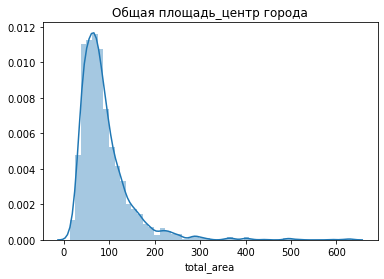

In [70]:
sns.distplot(good_data_center_spb['total_area']) #общая площадь
plt.title('Общая площадь_центр города')

In [71]:
good_data_center_spb['total_area'].value_counts() 

60.00     35
72.00     25
50.00     24
85.00     23
70.00     21
          ..
203.00     1
76.50      1
45.75      1
82.70      1
37.65      1
Name: total_area, Length: 896, dtype: int64

Text(0.5, 1.0, 'Цена_центр города')

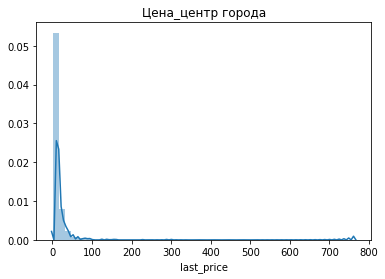

In [72]:
sns.distplot(good_data_center_spb['last_price']) #цена
plt.title('Цена_центр города')

In [73]:
good_data_center_spb['last_price'].value_counts()

8.50     34
6.50     32
7.50     31
8.00     27
9.00     24
         ..
5.82      1
8.78      1
36.75     1
11.25     1
26.31     1
Name: last_price, Length: 805, dtype: int64

Text(0.5, 1.0, 'Количество комнат_центр города')

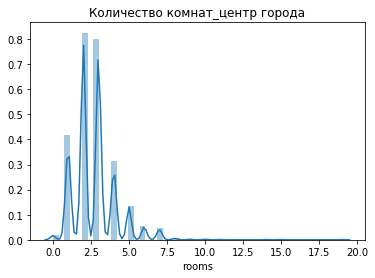

In [74]:
sns.distplot(good_data_center_spb['rooms']) #количество комнат
plt.title('Количество комнат_центр города')

In [75]:
good_data_center_spb['rooms'].value_counts()

2     721
3     700
1     364
4     276
5     119
6      49
7      41
0      16
8       5
9       2
10      2
19      1
15      1
11      1
14      1
Name: rooms, dtype: int64

Text(0.5, 1.0, 'Высота потолков_центр города')

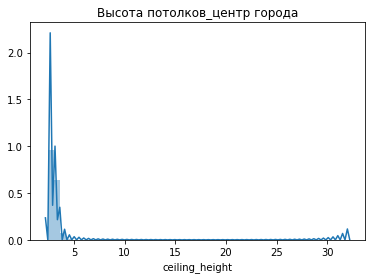

In [76]:
sns.distplot(good_data_center_spb['ceiling_height']) #высота потолков
plt.title('Высота потолков_центр города')

In [77]:
good_data_center_spb['ceiling_height'].value_counts()

2.65    821
3.00    308
3.20    107
2.50     80
2.80     79
       ... 
3.39      1
4.80      1
3.86      1
3.85      1
3.68      1
Name: ceiling_height, Length: 127, dtype: int64

###### Аналогичные показатели в целом по Санкт-Петербургу:

In [78]:
good_data['total_area'].value_counts() 

45.00     315
42.00     283
44.00     263
31.00     261
60.00     251
         ... 
243.00      1
114.50      1
26.20       1
45.64       1
49.85       1
Name: total_area, Length: 1840, dtype: int64

In [79]:
good_data['last_price'].value_counts()

4.500     267
3.500     225
3.600     214
4.000     205
4.300     200
         ... 
7.888       1
7.398       1
7.849       1
2.561       1
10.965      1
Name: last_price, Length: 2325, dtype: int64

In [80]:
good_data['rooms'].value_counts()

1     6137
2     5990
3     4133
4      762
5      200
0      168
6       66
7       46
9        5
8        5
10       3
15       1
14       1
12       1
11       1
19       1
Name: rooms, dtype: int64

In [81]:
good_data['ceiling_height'].value_counts()

2.65     7390
2.50     2734
2.60     1214
2.70     1172
3.00      765
         ... 
3.39        1
4.80        1
27.50       1
5.50        1
4.65        1
Name: ceiling_height, Length: 163, dtype: int64

Средняя квартира из выборки "центр Санкт-Петербурга" имеет следующие параметры: 2-3-комнатная квартира по цене 6,5-9,0 млн. руб. площадью 50-85 кв.м с потолками 2,65 м, в сравнении с параметрами по городу в целом: 1-2-комнаты, цена 3,5-4,5 млн. руб., 31-60 кв.м.,  потолки 2,65 м. 

##### Факторы влияющие на стоимость квартиры (удалённость от центра, число комнат, дата размещения объявления, этаж).

Text(0.5, 1, 'Тепловая карта корреляционной матрицы')

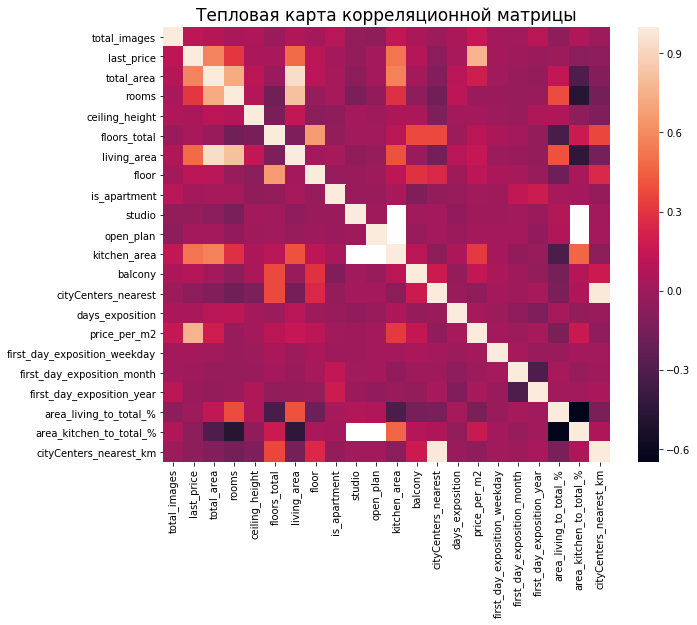

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(good_data_center_spb.corr()) 
plt.title('Тепловая карта корреляционной матрицы', fontsize=17)

In [83]:
good_data_center_spb.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_per_m2,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,area_living_to_total_%,area_kitchen_to_total_%,cityCenters_nearest_km
total_images,1.000000,0.117051,0.082440,0.038758,0.072616,-0.012515,0.067211,0.015890,0.093545,-0.041281,-0.054526,0.131355,0.045108,-0.004348,0.041448,0.149619,0.021105,0.010656,0.107453,-0.060334,0.060631,-0.007412
last_price,0.117051,1.000000,0.577313,0.306813,0.045703,0.036436,0.490742,0.107772,0.020876,-0.030050,0.021259,0.517747,0.088767,-0.063452,0.038810,0.761634,0.021641,0.007007,-0.013130,-0.006975,-0.079635,-0.060682
total_area,0.082440,0.577313,1.000000,0.727919,0.107557,-0.010983,0.938674,0.101238,0.032424,-0.069528,0.022667,0.565020,0.027541,-0.104969,0.103652,0.188931,0.011792,-0.021283,-0.034701,0.134650,-0.307753,-0.096385
rooms,0.038758,0.306813,0.727919,1.000000,0.084551,-0.166261,0.818156,-0.026198,0.032694,-0.137998,-0.043780,0.285403,-0.059416,-0.166948,0.114248,-0.023019,-0.011065,-0.024605,-0.017944,0.387290,-0.476500,-0.154636
ceiling_height,0.072616,0.045703,0.107557,0.084551,1.000000,-0.139426,0.131430,-0.075224,-0.054877,0.018879,-0.001528,0.057837,0.041880,-0.125156,0.026668,0.017731,-0.006835,-0.019754,0.067418,0.065825,-0.052735,-0.113817
floors_total,-0.012515,0.036436,-0.010983,-0.166261,-0.139426,1.000000,-0.122494,0.662477,-0.037000,0.010554,0.014374,0.101976,0.373636,0.375168,-0.010019,0.107824,0.050957,0.020935,-0.036729,-0.328902,0.174653,0.363723
living_area,0.067211,0.490742,0.938674,0.818156,0.131430,-0.122494,1.000000,0.022256,0.032615,-0.054245,-0.025591,0.402983,-0.015979,-0.158196,0.103046,0.149502,-0.008912,-0.012737,-0.034471,0.407940,-0.440897,-0.147734
floor,0.015890,0.107772,0.101238,-0.026198,-0.075224,0.662477,0.022256,1.000000,-0.024813,-0.014091,-0.003023,0.121987,0.288711,0.252833,0.003840,0.115016,0.052411,0.031095,-0.023208,-0.177917,0.035551,0.242808
is_apartment,0.093545,0.020876,0.032424,0.032694,-0.054877,-0.037000,0.032615,-0.024813,1.000000,-0.013252,-0.011166,0.039296,-0.110154,-0.038155,-0.020078,0.011234,0.007878,0.137627,0.180819,0.031742,0.026944,-0.035505
studio,-0.041281,-0.030050,-0.069528,-0.137998,0.018879,0.010554,-0.054245,-0.014091,-0.013252,1.000000,-0.003858,NaN,0.013599,0.015716,-0.045276,-0.003788,0.003395,0.009855,-0.013320,0.078667,NaN,0.010955


In [84]:
good_data_center_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 52 to 23694
Data columns (total 30 columns):
total_images                    2299 non-null int64
last_price                      2299 non-null float64
total_area                      2299 non-null float64
first_day_exposition            2299 non-null datetime64[ns]
rooms                           2299 non-null int64
ceiling_height                  2299 non-null float64
floors_total                    2299 non-null int64
living_area                     2076 non-null float64
floor                           2299 non-null int64
is_apartment                    2299 non-null bool
studio                          2299 non-null bool
open_plan                       2299 non-null bool
kitchen_area                    2052 non-null float64
balcony                         2299 non-null int64
locality_name                   2299 non-null object
airports_nearest                2295 non-null object
cityCenters_nearest             2299 non-

Text(0.5, 1.01, 'Зависимость цены от количества комнат_центр города')

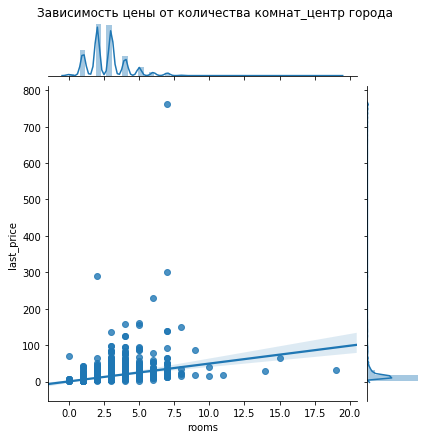

In [85]:
#зависимость цены от количества комнат
sns.jointplot(x=good_data_center_spb["rooms"], y=good_data_center_spb["last_price"], kind='reg')
plt.suptitle('Зависимость цены от количества комнат_центр города', y=1.01)

Text(0.5, 1.01, 'Зависимость цены: расстояние от населенного пункта до центра_центр города')

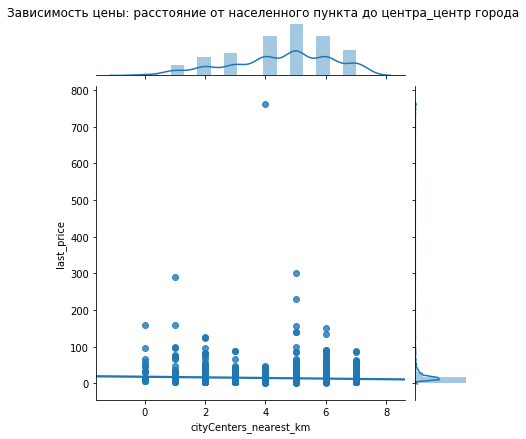

In [86]:
#зависимость цены от расстояния до центра
sns.jointplot(x=good_data_center_spb["cityCenters_nearest_km"], y=good_data_center_spb["last_price"], kind='reg')
plt.suptitle('Зависимость цены: расстояние от населенного пункта до центра_центр города', y=1.01)

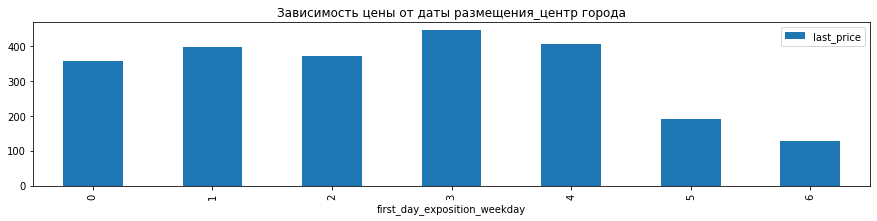

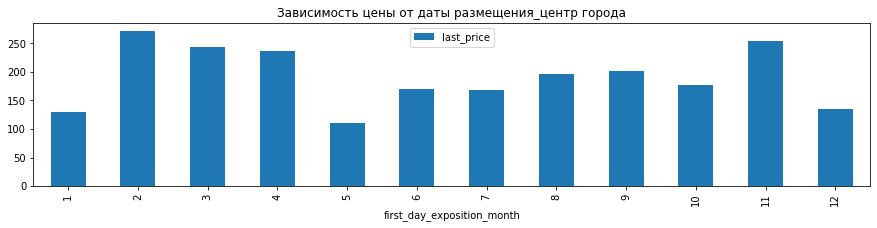

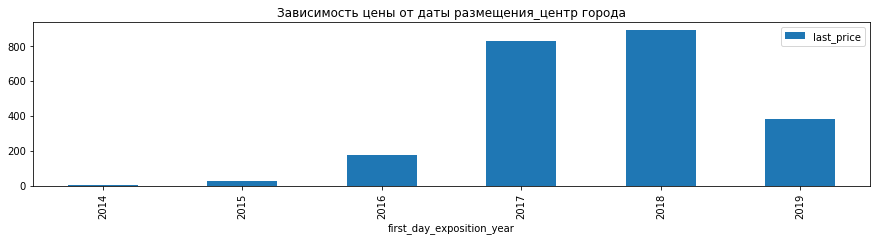

In [87]:
for columns in ['first_day_exposition_weekday', 'first_day_exposition_month', 'first_day_exposition_year']:
    (good_data_center_spb.pivot_table(index=columns, values= 'last_price', aggfunc='count', fill_value=0)
    .plot.bar(figsize=(15, 3)))
    plt.title('Зависимость цены от даты размещения_центр города')
    plt.show()

Text(0.5, 1.0, 'Зависимость цены от этажа_центр города')

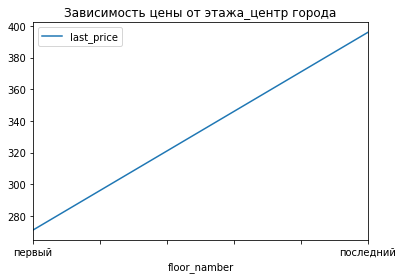

In [88]:
good_data_center_spb = good_data_center_spb.query('floor_namber != "другой"').pivot_table(index = 'floor_namber', values = 'last_price', aggfunc = ['count'])
good_data_center_spb.plot(y = 'count')
plt.title('Зависимость цены от этажа_центр города')

Высокая корреляция в 0,29 цены в зависимости от количества комнат сохраняется и по квартирам непосредственно в центре Санкт-Петербурга при реально более высокой доле платежеспособных покупателей.
<br>Чем ближе квартира к центру, тем выше ее цена, но в радиусе 5 км от центра- максимумы значений цены на 4-5км.
<br>По дате публикации корреляция низкая и наиболее активные периоды уже: Вторник, Четверг, Пятница; месяцы- Февраль-Апрель и Ноябрь, а динамика по годам сохраняет вектор роста на 2017-2018гг.
<br>Разница в цене по первому и последнему этажам уже 33% (коэфициент корреляции 0,12) в сравнении с окрестностями.

### Шаг 5. Общий вывод <a id='step11'></a>

Оценка рыночной стоимости объектов недвижимости Санкт-Петербурга продемонстрировала реальные тенденции в действии:
данные предстают не в полном объеме с приличным количеством пропусков и ошибок при этом выводы получаются правдоподобными:
<br> ~самый важный параметр при определении стоимости- общая площадь квартиры (более 105 кв.м следует проверять данные на корректность);
<br> ~этаж квартиры, этажность дома- чем выше и современнее, цена выше;
<br> ~приближение к центру также дает рост в цене, но есть и деревенские пентхаусы почти сопоставимые по стоимости с центром;
<br> ~многокомнатные квартиры в центре более востребованы при наличии спроса у покупателей с бОльшей платежеспосоюностью;
<br> ~в среднем продажа квартир осуществляется за 3 месяца, поэтому недельный спринт и годовые метрики вызывают сомнение.